# Import Pertinent Libraries/Load Dataset

#### Importing Libraries

In [217]:
import sqlite3
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

####  Loading Dataset/Tables

In [218]:
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [219]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [220]:
cur.execute('''SELECT * FROM Product''')
product_data = pd.DataFrame(cur.fetchall())
product_data.columns = [x[0] for x in cur.description]
display(len(product_data))
product_data.head()

77

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [221]:
#Column ID should be named ProductId for easier calling of data

In [222]:
cur.execute('''SELECT * FROM Supplier''')
supplier_data = pd.DataFrame(cur.fetchall())
supplier_data.columns = [x[0] for x in cur.description]
display(len(supplier_data))
supplier_data.head()

29

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [223]:
cur.execute('''SELECT * FROM Region''')
region_data = pd.DataFrame(cur.fetchall())
region_data.columns = [x[0] for x in cur.description]
display(len(region_data))
region_data.head()

4

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [224]:
cur.execute('''SELECT * FROM [Order]''')
order_data = pd.DataFrame(cur.fetchall())
order_data.columns = [x[0] for x in cur.description]
display(len(order_data))
order_data.head()

830

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [225]:
cur.execute('''SELECT * FROM OrderDetail''')
order_detail_data = pd.DataFrame(cur.fetchall())
order_detail_data.columns = [x[0] for x in cur.description]
display(len(order_detail_data))
order_detail_data.head()

2155

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [226]:
cur.execute('''SELECT * FROM Category''')
category_data = pd.DataFrame(cur.fetchall())
category_data.columns = [x[0] for x in cur.description]
display(len(category_data))
category_data.head()

8

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [227]:
cur.execute('''SELECT * FROM Employee''')
employee_data = pd.DataFrame(cur.fetchall())
employee_data.columns = [x[0] for x in cur.description]
display(len(employee_data))
employee_data.head()

9

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [228]:
cur.execute('''SELECT * FROM EmployeeTerritory''')
employee_territory_data = pd.DataFrame(cur.fetchall())
employee_territory_data.columns = [x[0] for x in cur.description]
display(len(employee_territory_data))
employee_territory_data.head()

49

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [229]:
cur.execute('''SELECT * FROM Territory''')
territory_data = pd.DataFrame(cur.fetchall())
territory_data.columns = [x[0] for x in cur.description]
display(len(territory_data))
territory_data.head()

53

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [230]:
cur.execute('''SELECT * FROM Customer''')
customer_data = pd.DataFrame(cur.fetchall())
customer_data.columns = [x[0] for x in cur.description]
display(len(customer_data))
customer_data.head()

91

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [231]:
cur.execute('''SELECT * FROM Shipper''')
shipper_data = pd.DataFrame(cur.fetchall())
shipper_data.columns = [x[0] for x in cur.description]
display(len(shipper_data))
shipper_data.head()

3

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


The below tables contain no data. Will be omitted during Data inspection, cleaning, and, EDA. BBRING TO SHAREHOLDERS' ATTENTION

In [232]:
cur.execute('''SELECT * FROM CustomerCustomerDemo''')
customer_customer_demo_data = pd.DataFrame(cur.fetchall())
display(len(customer_customer_demo_data))
customer_customer_demo_data.head()

0

""


In [233]:
cur.execute('''SELECT * FROM CustomerDemographic''')
customer_demographic_data = pd.DataFrame(cur.fetchall())
display(len(customer_demographic_data))
customer_demographic_data.head()

0

""


# Data Inspection and Cleaning

#### Checking data type/missing data points/duplicates

In [234]:
#needed a function to streamline inspection
def data_inspector(df):
    duplicates = df[df.duplicated()]
    display('----Missing Values----',df.isna().sum())
    display('----Duplicate Values----')
    display(str(len(duplicates))  + ' duplicates')
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n\n')

In [235]:
frames_dict = {'product data': product_data, 'supplier data': supplier_data, 'order data': order_data, 
          'order detail data': order_detail_data, 'category': category_data, 'employee data': employee_data, 
          'employee territory data': employee_territory_data, 'territory data': territory_data, 
          'customer data': customer_data, 'shipper data': shipper_data, 'region data' :region_data}

In [236]:
frames = [product_data, supplier_data, order_data, order_detail_data, category_data, employee_data, 
          employee_territory_data, territory_data, customer_data, shipper_data, region_data]
for i in frames:
    for key in frames_dict:
        print('--------------------------------', key.upper(), '--------------------------------')
        data_inspector(i)

-------------------------------- PRODUCT DATA --------------------------------


'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

Discontinued 
 0    0.896104
1    0.103896
Name: Discontinued, dtype: float64 


-------------------------------- TERRITORY DATA --------------------------------


'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Nord-Ost Matjeshering     

Name: UnitsInStock, dtype: float64 


UnitsOnOrder 
 0      0.779221
70     0.051948
10     0.051948
40     0.038961
100    0.012987
80     0.012987
60     0.012987
50     0.012987
30     0.012987
20     0.012987
Name: UnitsOnOrder, dtype: float64 


ReorderLevel 
 0     0.311688
25    0.155844
15    0.129870
30    0.103896
20    0.103896
5     0.103896
10    0.090909
Name: ReorderLevel, dtype: float64 


Discontinued 
 0    0.896104
1    0.103896
Name: Discontinued, dtype: float64 


-------------------------------- PRODUCT DATA --------------------------------


'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

HomePage 
 Mayumi's (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/mayumi.htm#        0.2
G'day Mate (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/gdaymate.htm#    0.2
Plutzer (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/plutzer.htm#        0.2
#CAJUN.HTM#                                                                                       0.2
#FORMAGGI.HTM#                                                                                    0.2
Name: HomePage, dtype: float64 


-------------------------------- TERRITORY DATA --------------------------------


'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

Name: Fax, dtype: float64 


HomePage 
 Mayumi's (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/mayumi.htm#        0.2
G'day Mate (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/gdaymate.htm#    0.2
Plutzer (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/plutzer.htm#        0.2
#CAJUN.HTM#                                                                                       0.2
#FORMAGGI.HTM#                                                                                    0.2
Name: HomePage, dtype: float64 


-------------------------------- SHIPPER DATA --------------------------------


'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Karkki Oy                                 0.034483
Mayumi's                                  0.034483
Refrescos Americanas LTDA                 0.034483
Pavlova, Ltd.                             0.034483
New England Seafood Cannery               0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Formaggi Fortini s.r.l.                   0.034483
Lyngbysild                                0.034483
PB Knäckebröd AB                          0.034483
Specialty Biscuits, Ltd.                  0.034483
Leka Tra

Name: HomePage, dtype: float64 


-------------------------------- PRODUCT DATA --------------------------------


'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipPostalCode 
 83720        0.038224
8010         0.036991
01307        0.034525
S-844 67     0.023428
S-958 22     0.022195
87110        0.022195
5022         0.022195
13008        0.020962
05033        0.019729
1010         0.019729
80805        0.018496
90110        0.018496
60528        0.018496
98124        0.017263
31000        0.017263
3508         0.017263
T2F 8M4      0.017263
14776        0.017263
05454-876    0.017263
H1J 1C3      0.016030
05487-020    0.016030
CO7 6JX      0.016030
42100        0.014797
4980         0.014797
B-6000       0.014797
8200         0.013564
02389-890    0.013564
67000        0.013564
97403        0.013564
5020         0.012330
               ...   
21240        0.008631
05442-030    0.008631
4110         0.007398
05634-030    0.007398
52066        0.007398
44087        0.007398
12209        0.007398
10100        0.007398
8022         0.006165
97827        0.006165
1756         0.006165
59000        0.006165
05432-043    0.006165
04179        0.

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Bräcke             0.022892
Cork               0.022892
San Cristóbal      0.021687
Luleå              0.021687
Albuquerque        0.021687
Marseille          0.020482
Buenos Aires       0.019277
München            0.018072
Oulu               0.018072
Frankfurt a.M.     0.018072
Toulouse           0.016867
Seattle            0.016867
Brandenburg        0.016867
Barquisimeto       0.016867
Tsawassen          0.016867
Lisboa             0.015663
Montréal           0.015663
Colchester         0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Århus              0.013253
                     ...   
Lyon               0.012048
Lander             0.010843
Campinas           0.010843
Resende            0.010843
Bern     

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Bräcke             0.022892
Cork               0.022892
San Cristóbal      0.021687
Luleå              0.021687
Albuquerque        0.021687
Marseille          0.020482
Buenos Aires       0.019277
München            0.018072
Oulu               0.018072
Frankfurt a.M.     0.018072
Toulouse           0.016867
Seattle            0.016867
Brandenburg        0.016867
Barquisimeto       0.016867
Tsawassen          0.016867
Lisboa             0.015663
Montréal           0.015663
Colchester         0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Århus              0.013253
                     ...   
Lyon               0.012048
Lander             0.010843
Campinas           0.010843
Resende            0.010843
Bern     

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipCity, Length: 70, dtype: float64 


ShipRegion 
 Western Europe     0.332530
North America      0.183133
South America      0.174699
British Isles      0.090361
Southern Europe    0.077108
Northern Europe    0.066265
Central America    0.033735
Scandinavia        0.033735
Eastern Europe     0.008434
Name: ShipRegion, dtype: float64 


ShipPostalCode 
 83720        0.038224
8010         0.036991
01307        0.034525
S-844 67     0.023428
S-958 22     0.022195
87110        0.022195
5022         0.022195
13008        0.020962
05033        0.019729
1010         0.019729
80805        0.018496
90110        0.018496
60528        0.018496
98124        0.017263
31000        0.017263
3508         0.017263
T2F 8M4      0.017263
14776        0.017263
05454-876    0.017263
H1J 1C3      0.016030
05487-020    0.016030
CO7 6JX      0.016030
42100        0.014797
4980         0.014797
B-6000       0.014797
8200         0.013564
02389-890    0.013564
67000        0.013564
97403        0.01356

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipAddress 
 187 Suffolk Ln.                                   0.037349
Kirchgasse 6                                      0.036145
Taucherstraße 10                                  0.033735
8 Johnstown Road                                  0.022892
Åkergatan 24                                      0.022892
Berguvsvägen  8                                   0.021687
2817 Milton Dr.                                   0.021687
Carrera 22 con Ave. Carlos Soublette #8-35        0.021687
12, rue des Bouchers                              0.020482
Berliner Platz 43                                 0.018072
Torikatu 38                                       0.018072
Magazinweg 7                                      0.018072
Maubelstr. 90                                     0.016867
1 rue Alsace-Lorraine                             0.016867
23 Tsawassen Blvd.                                0.016867
1029 - 12th Ave. S.                               0.016867
Carrera 52 con Ave. Bolívar #65-98 Llano L

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipCity, Length: 70, dtype: float64 


ShipRegion 
 Western Europe     0.332530
North America      0.183133
South America      0.174699
British Isles      0.090361
Southern Europe    0.077108
Northern Europe    0.066265
Central America    0.033735
Scandinavia        0.033735
Eastern Europe     0.008434
Name: ShipRegion, dtype: float64 


ShipPostalCode 
 83720        0.038224
8010         0.036991
01307        0.034525
S-844 67     0.023428
S-958 22     0.022195
87110        0.022195
5022         0.022195
13008        0.020962
05033        0.019729
1010         0.019729
80805        0.018496
90110        0.018496
60528        0.018496
98124        0.017263
31000        0.017263
3508         0.017263
T2F 8M4      0.017263
14776        0.017263
05454-876    0.017263
H1J 1C3      0.016030
05487-020    0.016030
CO7 6JX      0.016030
42100        0.014797
4980         0.014797
B-6000       0.014797
8200         0.013564
02389-890    0.013564
67000        0.013564
97403        0.01356

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipAddress, Length: 89, dtype: float64 


ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Bräcke             0.022892
Cork               0.022892
San Cristóbal      0.021687
Luleå              0.021687
Albuquerque        0.021687
Marseille          0.020482
Buenos Aires       0.019277
München            0.018072
Oulu               0.018072
Frankfurt a.M.     0.018072
Toulouse           0.016867
Seattle            0.016867
Brandenburg        0.016867
Barquisimeto       0.016867
Tsawassen          0.016867
Lisboa             0.015663
Montréal           0.015663
Colchester         0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Århus              0.013253
                     ...   
Lyon               0.012048
Lander             0.010843
Campinas        

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipPostalCode, Length: 84, dtype: float64 


ShipCountry 
 Germany        0.146988
USA            0.146988
Brazil         0.100000
France         0.092771
UK             0.067470
Venezuela      0.055422
Austria        0.048193
Sweden         0.044578
Canada         0.036145
Italy          0.033735
Mexico         0.033735
Spain          0.027711
Finland        0.026506
Belgium        0.022892
Ireland        0.022892
Denmark        0.021687
Switzerland    0.021687
Argentina      0.019277
Portugal       0.015663
Poland         0.008434
Norway         0.007229
Name: ShipCountry, dtype: float64 


-------------------------------- CUSTOMER DATA --------------------------------


'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Bräcke             0.022892
Cork               0.022892
San Cristóbal      0.021687
Luleå              0.021687
Albuquerque        0.021687
Marseille          0.020482
Buenos Aires       0.019277
München            0.018072
Oulu               0.018072
Frankfurt a.M.     0.018072
Toulouse           0.016867
Seattle            0.016867
Brandenburg        0.016867
Barquisimeto       0.016867
Tsawassen          0.016867
Lisboa             0.015663
Montréal           0.015663
Colchester         0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Århus              0.013253
                     ...   
Lyon               0.012048
Lander             0.010843
Campinas           0.010843
Resende            0.010843
Bern     

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipName, Length: 90, dtype: float64 


ShipAddress 
 187 Suffolk Ln.                                   0.037349
Kirchgasse 6                                      0.036145
Taucherstraße 10                                  0.033735
8 Johnstown Road                                  0.022892
Åkergatan 24                                      0.022892
Berguvsvägen  8                                   0.021687
2817 Milton Dr.                                   0.021687
Carrera 22 con Ave. Carlos Soublette #8-35        0.021687
12, rue des Bouchers                              0.020482
Berliner Platz 43                                 0.018072
Torikatu 38                                       0.018072
Magazinweg 7                                      0.018072
Maubelstr. 90                                     0.016867
1 rue Alsace-Lorraine                             0.016867
23 Tsawassen Blvd.                                0.016867
1029 - 12th Ave. S.                               0.016

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

 187 Suffolk Ln.                                   0.037349
Kirchgasse 6                                      0.036145
Taucherstraße 10                                  0.033735
8 Johnstown Road                                  0.022892
Åkergatan 24                                      0.022892
Berguvsvägen  8                                   0.021687
2817 Milton Dr.                                   0.021687
Carrera 22 con Ave. Carlos Soublette #8-35        0.021687
12, rue des Bouchers                              0.020482
Berliner Platz 43                                 0.018072
Torikatu 38                                       0.018072
Magazinweg 7                                      0.018072
Maubelstr. 90                                     0.016867
1 rue Alsace-Lorraine                             0.016867
23 Tsawassen Blvd.                                0.016867
1029 - 12th Ave. S.                               0.016867
Carrera 52 con Ave. Bolívar #65-98 Llano Largo    0.016

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10661/58    0.000464
10954/16    0.000464
11077/55    0.000464
10962/76    0.000464
10747/69    0.000464
10621/19    0.000464
10268/72    0.000464
10558/73    0.000464
10452/28    0.000464
10367/77    0.000464
10942/49    0.000464
10819/75    0.000464
10544/67    0.000464
10623/21    0.000464
10879/65    0.000464
10328/68    0.000464
10536/33    0.000464
10652/42    0.000464
10302/43    0.000464
10771/71    0.000464
10831/35    0.000464
10502/45    0.000464
10745/72    0.000464
10990/21    0.000464
10366/77    0.000464
10336/4     0.000464
10627/73    0.000464
10251/22    0.000464
10613/75    0.000464
10946/77    0.000464
              ...   
11042/61    0.000464
10892/59    0.000464
11068/28    0.000464
10412/14    0.000464
10285/1     0.000464
10919/40    0.000464
10645/18    0.000464
10358/24    0.000464
10893/30    0.000464
10954/60    0.000464
10932/72    0.000464
10672/71    0.000464
10849/26    0.000464
11012/60    0.000464
10323/39    0.000464
10683/52    0.000464
10855/16

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- SUPPLI

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- ORDER 

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- ORDER 

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- CATEGO

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- EMPLOY

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- EMPLOY

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- TERRIT

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- CUSTOM

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- SHIPPE

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- REGION

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Dairy Products    0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Confections       0.125
Beverages         0.125
Seafood           0.125
Produce           0.125
Name: CategoryName, dtype: float64 


Description 
 Breads, crackers, pasta, and cereal                           0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Prepared meats                                                0.125
Desserts, candies, and sweet breads                           0.125
Dried fruit and bean curd                                     0.125
Name: Description, dtype: float64 


-------------------------------- PRODUC

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Fuller       0.111111
Buchanan     0.111111
Leverling    0.111111
Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Suyama       0.111111
King         0.111111
Dodsworth    0.111111
Name: LastName, dtype: float64 


FirstName 
 Anne        0.111111
Margaret    0.111111
Nancy       0.111111
Janet       0.111111
Andrew      0.111111
Michael     0.111111
Steven      0.111111
Robert      0.111111
Laura       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Inside Sales Coordinator    0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Dr.     0.111111
Mrs.    0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1995-07-02    0.111111
1987-03-04   

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 6/85251    0.020408
7/60179    0.020408
4/20852    0.020408
3/31406    0.020408
4/27511    0.020408
6/98052    0.020408
6/98004    0.020408
7/94025    0.020408
9/03049    0.020408
7/94105    0.020408
9/48304    0.020408
5/08837    0.020408
2/02139    0.020408
9/55439    0.020408
1/19713    0.020408
7/90405    0.020408
9/48075    0.020408
7/80909    0.020408
7/80202    0.020408
4/27403    0.020408
9/55113    0.020408
2/01730    0.020408
9/03801    0.020408
8/44122    0.020408
5/14450    0.020408
5/02903    0.020408
9/48084    0.020408
2/01833    0.020408
5/10019    0.020408
2/02184    0.020408
8/19428    0.020408
5/07960    0.020408
3/32859    0.020408
5/11747    0.020408
2/02116    0.020408
6/98104    0.020408
1/06897    0.020408
2/40222    0.020408
3/33607    0.020408
7/95008    0.020408
6/85014    0.020408
7/95054    0.020408
8/45839    0.020408
5/10038    0.020408
8/53404    0.020408
7/60601    0.020408
7/95060    0.020408
2/01581    0.020408
3/30346    0.020408
Name: Id, dtype

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 55113    0.018868
60601    0.018868
01833    0.018868
03049    0.018868
45839    0.018868
85251    0.018868
33607    0.018868
30346    0.018868
06897    0.018868
72716    0.018868
95060    0.018868
02903    0.018868
07960    0.018868
10038    0.018868
95008    0.018868
94025    0.018868
90405    0.018868
80202    0.018868
27511    0.018868
19713    0.018868
98004    0.018868
14450    0.018868
27403    0.018868
08837    0.018868
19428    0.018868
60179    0.018868
44122    0.018868
48084    0.018868
98104    0.018868
55439    0.018868
31406    0.018868
40222    0.018868
80909    0.018868
53404    0.018868
02139    0.018868
98052    0.018868
20852    0.018868
78759    0.018868
29202    0.018868
48304    0.018868
10019    0.018868
01581    0.018868
02184    0.018868
75234    0.018868
11747    0.018868
94105    0.018868
02116    0.018868
85014    0.018868
03801    0.018868
95054    0.018868
48075    0.018868
01730    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
05033        0.022222
44000        0.022222
V3F 2K1      0.011111
97403        0.011111
82520        0.011111
05442-030    0.011111
05487-020    0.011111
50739        0.011111
83720        0.011111
3508         0.011111
01307        0.011111
H1J 1C3      0.011111
05454-876    0.011111
1756         0.011111
04179        0.011111
69004        0.011111
97201        0.011111
75012        0.011111
S-844 67     0.011111
WX1 6LT      0.011111
B-6000       0.011111
75016        0.011111
10100        0.011111
99508        0.011111
WX3 6FW      0.011111
EC2 5NT      0.011111
21240        0.011111
4980         0.011111
13008        0.011111
               ...   
60528       

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

City 
 London             0.065934
México D.F.        0.054945
Sao Paulo          0.043956
Buenos Aires       0.032967
Rio de Janeiro     0.032967
Madrid             0.032967
Paris              0.021978
Portland           0.021978
Nantes             0.021978
Lisboa             0.021978
Seattle            0.010989
Walla Walla        0.010989
Cunewalde          0.010989
Köln               0.010989
Strasbourg         0.010989
Torino             0.010989
Helsinki           0.010989
Versailles         0.010989
Oulu               0.010989
Berlin             0.010989
Aachen             0.010989
Stuttgart          0.010989
Luleå              0.010989
Elgin              0.010989
Lander             0.010989
I. de Margarita    0.010989
Lyon               0.010989
München            0.010989
Anchorage          0.010989
Butte              0.010989
                     ...   
Marseille          0.010989
Campinas           0.010989
Bergamo            0.010989
Warszawa           0.010989
Genève       

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

Name: City, Length: 69, dtype: float64 


Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
05033        0.022222
44000        0.022222
V3F 2K1      0.011111
97403        0.011111
82520        0.011111
05442-030    0.011111
05487-020    0.011111
50739        0.011111
83720        0.011111
3508         0.011111
01307        0.011111
H1J 1C3      0.011111
05454-876    0.011111
1756         0.011111
04179        0.011111
69004        0.011111
97201        0.011111
75012        0.011111
S-844 67     0.011111
WX1 6LT      0.011111
B-6000       0.011111
75016        0.011111
10100        0.011111
99508        0.011111
WX3 6FW      0.011111
EC2 5NT      0.011111
21240        0.011111
4980         0.011111
13008        0

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
05033        0.022222
44000        0.022222
V3F 2K1      0.011111
97403        0.011111
82520        0.011111
05442-030    0.011111
05487-020    0.011111
50739        0.011111
83720        0.011111
3508         0.011111
01307        0.011111
H1J 1C3      0.011111
05454-876    0.011111
1756         0.011111
04179        0.011111
69004        0.011111
97201        0.011111
75012        0.011111
S-844 67     0.011111
WX1 6LT      0.011111
B-6000       0.011111
75016        0.011111
10100        0.011111
99508        0.011111
WX3 6FW      0.011111
EC2 5NT      0.011111
21240        0.011111
4980         0.011111
13008        0.011111
               ...   
60528       

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

PostalCode 
 1010         0.033333
05033        0.022222
44000        0.022222
V3F 2K1      0.011111
97403        0.011111
82520        0.011111
05442-030    0.011111
05487-020    0.011111
50739        0.011111
83720        0.011111
3508         0.011111
01307        0.011111
H1J 1C3      0.011111
05454-876    0.011111
1756         0.011111
04179        0.011111
69004        0.011111
97201        0.011111
75012        0.011111
S-844 67     0.011111
WX1 6LT      0.011111
B-6000       0.011111
75016        0.011111
10100        0.011111
99508        0.011111
WX3 6FW      0.011111
EC2 5NT      0.011111
21240        0.011111
4980         0.011111
13008        0.011111
               ...   
60528        0.011111
28001        0.011111
1675         0.011111
59000        0.011111
97219        0.011111
T2F 8M4      0.011111
94117        0.011111
B-1180       0.011111
41101        0.011111
01-012       0.011111
OX15 4NB     0.011111
98128        0.011111
02389-673    0.011111
08737-363    0.0111

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

Name: Country, dtype: float64 


Phone 
 (415) 555-5938     0.010989
0241-039123        0.010989
61.77.61.10        0.010989
(1) 135-5555       0.010989
(02) 201 24 67     0.010989
(11) 555-1189      0.010989
(5) 555-4729       0.010989
(505) 555-5939     0.010989
(11) 555-9857      0.010989
(503) 555-7555     0.010989
(2) 283-2951       0.010989
(1) 354-2534       0.010989
981-443655         0.010989
0711-020361        0.010989
0555-09876         0.010989
30.59.84.10        0.010989
0897-034214        0.010989
91.24.45.40        0.010989
(1) 135-5333       0.010989
(93) 203 4560      0.010989
(509) 555-7969     0.010989
(198) 555-8888     0.010989
(1) 42.34.22.66    0.010989
(8) 34-56-12       0.010989
07-98 92 35        0.010989
0221-0644327       0.010989
(21) 555-4252      0.010989
(206) 555-8257     0.010989
(21) 555-0091      0.010989
(171) 555-1212     0.010989
                     ...   
(95) 555 82 82     0.010989
(171) 555-2282     0.010989
2967 542           0.010989
(21) 55

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 FURIB    0.010989
KOENE    0.010989
AROUT    0.010989
CENTC    0.010989
PRINI    0.010989
VAFFE    0.010989
BERGS    0.010989
LAZYK    0.010989
HANAR    0.010989
FRANR    0.010989
WARTH    0.010989
PERIC    0.010989
BOLID    0.010989
RICSU    0.010989
QUICK    0.010989
DRACD    0.010989
GOURL    0.010989
MEREP    0.010989
COMMI    0.010989
OCEAN    0.010989
TRADH    0.010989
LACOR    0.010989
FRANS    0.010989
PARIS    0.010989
REGGC    0.010989
SPLIR    0.010989
VICTE    0.010989
ERNSH    0.010989
LEHMS    0.010989
SEVES    0.010989
           ...   
MAISD    0.010989
SAVEA    0.010989
HUNGO    0.010989
ANATR    0.010989
NORTS    0.010989
WANDK    0.010989
GREAL    0.010989
THEBI    0.010989
SPECD    0.010989
LILAS    0.010989
LAUGB    0.010989
TOMSP    0.010989
LINOD    0.010989
CHOPS    0.010989
RATTC    0.010989
BSBEV    0.010989
WOLZA    0.010989
TRAIH    0.010989
SIMOB    0.010989
GODOS    0.010989
CONSH    0.010989
PICCO    0.010989
LETSS    0.010989
CACTU    0.010989
HILAA

Name: Address, Length: 91, dtype: float64 


City 
 London             0.065934
México D.F.        0.054945
Sao Paulo          0.043956
Buenos Aires       0.032967
Rio de Janeiro     0.032967
Madrid             0.032967
Paris              0.021978
Portland           0.021978
Nantes             0.021978
Lisboa             0.021978
Seattle            0.010989
Walla Walla        0.010989
Cunewalde          0.010989
Köln               0.010989
Strasbourg         0.010989
Torino             0.010989
Helsinki           0.010989
Versailles         0.010989
Oulu               0.010989
Berlin             0.010989
Aachen             0.010989
Stuttgart          0.010989
Luleå              0.010989
Elgin              0.010989
Lander             0.010989
I. de Margarita    0.010989
Lyon               0.010989
München            0.010989
Anchorage          0.010989
Butte              0.010989
                     ...   
Marseille          0.010989
Campinas           0.010989
Bergamo            0.010

'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- SUPPLIER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- ORDER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- ORDER DETAIL DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- CATEGORY --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- EMPLOYEE DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- EMPLOYEE TERRITORY DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- TERRITORY DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- CUSTOMER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- SHIPPER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- REGION DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 United Package      0.333333
Federal Shipping    0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-3199    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 


-------------------------------- PRODUCT DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- SUPPLIER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- ORDER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- ORDER DETAIL DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- CATEGORY --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- EMPLOYEE DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- EMPLOYEE TERRITORY DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- TERRITORY DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- CUSTOMER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- SHIPPER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- REGION DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Southern    0.25
Northern    0.25
Eastern     0.25
Western     0.25
Name: RegionDescription, dtype: float64 




The supplier table is missing fax numbers and home pages. More than likely will not impact EDA but should be brought to the attention of stakeholders.

ShippedDate and ShipPostalCode are missing values. This information can be crutial during EDA. BRING TO THE ATTENTION OF SHAREHOLDERS.

Photos being missing is no biggie. Missing ReportTo is the highest ranking company employee. Of no consequence.

The missing value in PostalCode could be pertinent if we examine data focusing on that. Make note.

Final thoughts: 
Data was fairly clean with no extraneous or duplicated values spotted. 
Focus will need to be placed on explaining the shortfalls of the data collection process to shareholders for acquisition of cleaner data.

# EDA

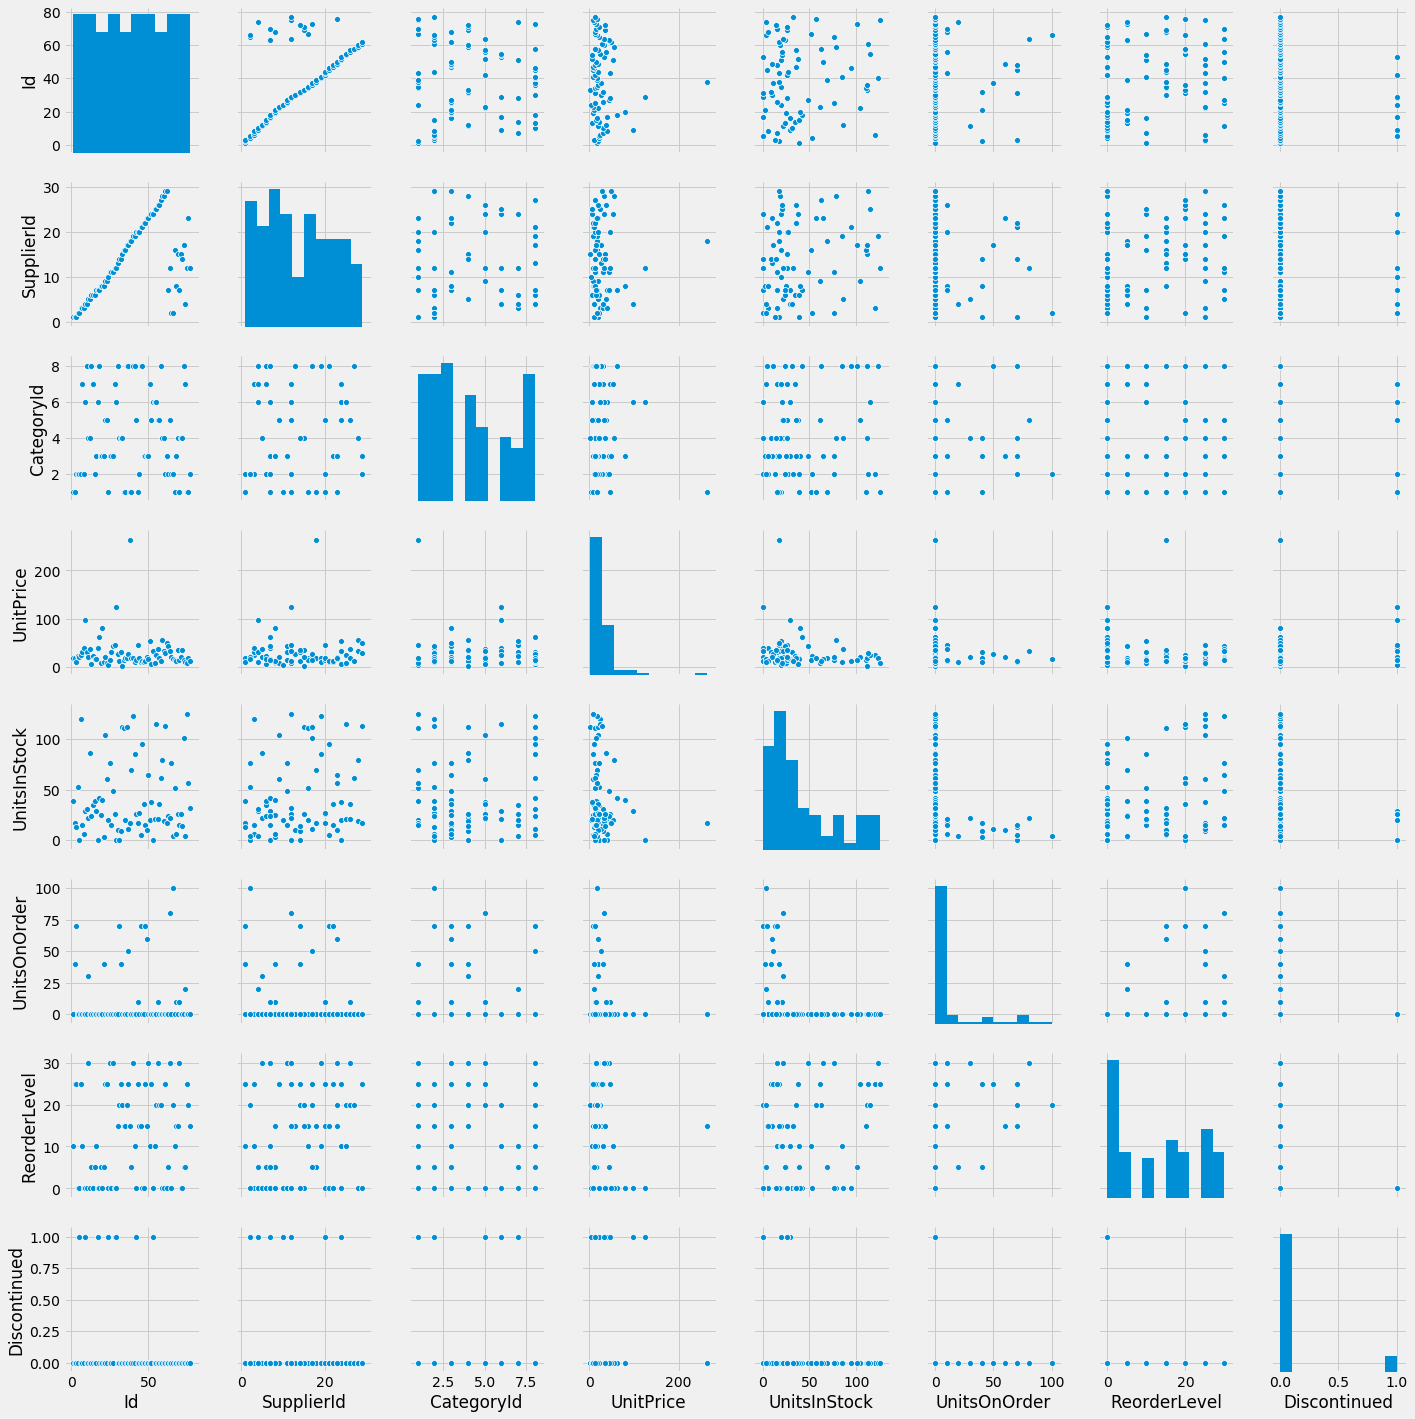

In [237]:
sns.pairplot(product_data);

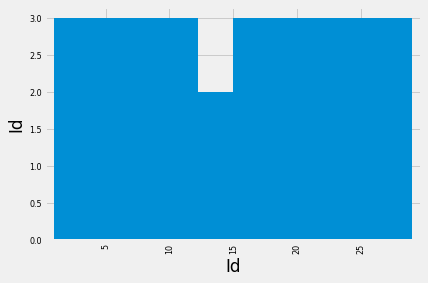

In [238]:
pd.plotting.scatter_matrix(supplier_data); 

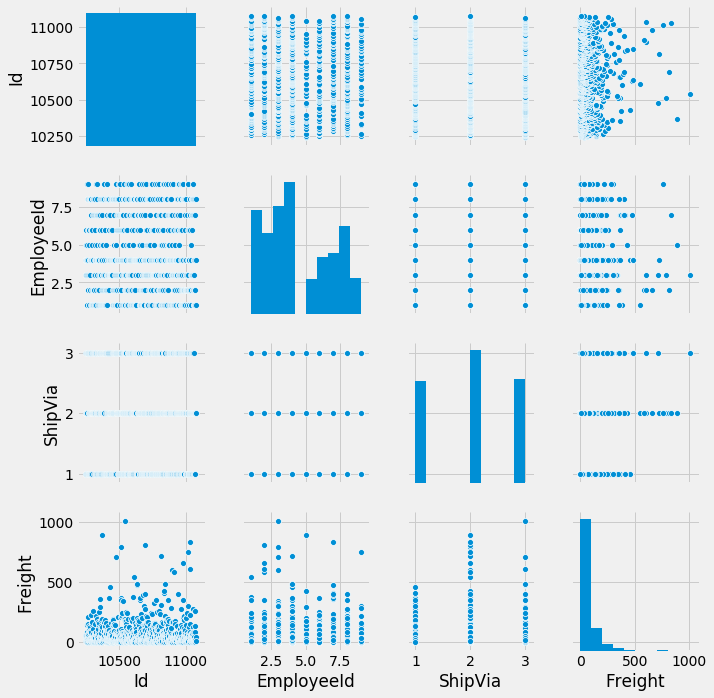

In [239]:
sns.pairplot(order_data);

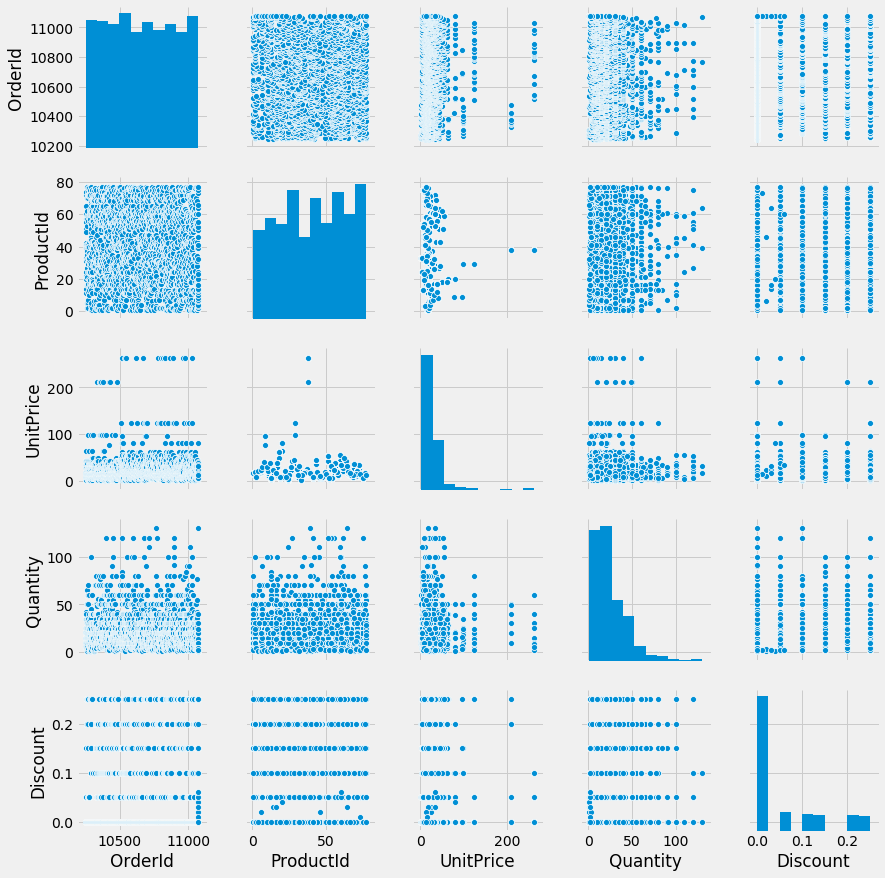

In [240]:
sns.pairplot(order_detail_data);

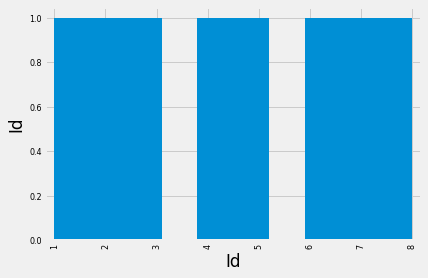

In [241]:
pd.plotting.scatter_matrix(category_data); 

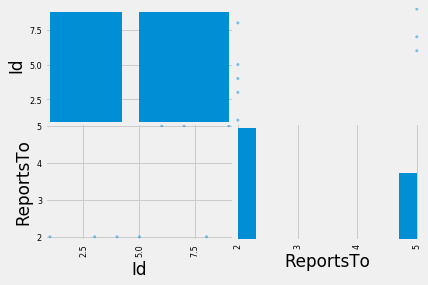

In [242]:
pd.plotting.scatter_matrix(employee_data);

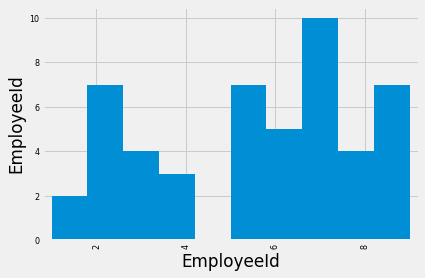

In [243]:
pd.plotting.scatter_matrix(employee_territory_data);

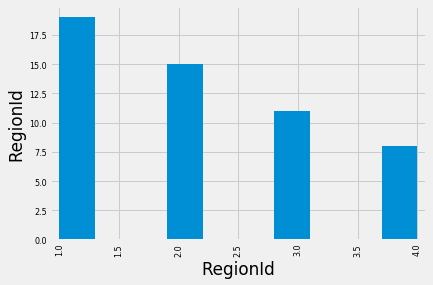

In [244]:
pd.plotting.scatter_matrix(territory_data);

Customer_data cannot be visually displayed due to indexing and formatting of the data within the table. 

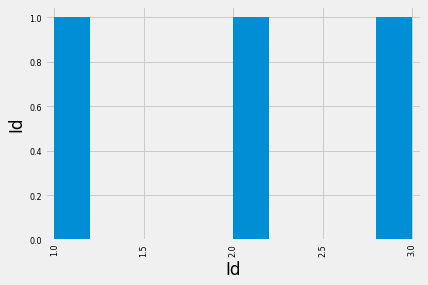

In [245]:
pd.plotting.scatter_matrix(shipper_data);

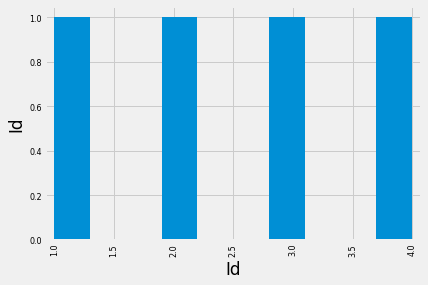

In [246]:
pd.plotting.scatter_matrix(region_data);

Final thoughts:
A lot of the data within this database is categorical in nature.
None of the data displays a normal distribution. Data is either skewed, displays a high degree of curtosis, or a combination of the 2. 

### Revenue

In [247]:
#Breakdown revenue per region, freight spend per region
cur.execute("""SELECT * FROM [Order]
                JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId""")
revenue= pd.DataFrame(cur.fetchall())
revenue.columns = [x[0] for x in cur.description]
revenue['Revenue'] = revenue.Quantity * revenue.UnitPrice
revenue.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Revenue
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0,168.0
1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0,98.0
2,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0,174.0
3,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0,167.4
4,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0,1696.0


Converting OrderDate to datetime for easier data manipulation.

In [248]:
revenue['OrderDate'] = revenue['OrderDate'].astype('datetime64[ns]')
revenue['YearOrdered'] = revenue['OrderDate'].dt.year
revenue['MonthOrdered'] = revenue['OrderDate'].dt.month
revenue['Month_Year'] = revenue['YearOrdered'].map(str) + '-' + revenue['MonthOrdered'].map(str)

In [249]:
revenue.head(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Revenue,YearOrdered,MonthOrdered,Month_Year
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,10248/11,10248,11,14.0,12,0.0,168.0,2012,7,2012-7


Parsing revenue by year

In [250]:
revenue['YearOrdered'].unique()

array([2012, 2013, 2014], dtype=int64)

Grouping revenue by year to create clean visual

In [251]:
aggregation_functions = {'Revenue': 'sum', 'Month_Year': 'first', 'CustomerId': 'first', 'Freight': 'first', 
                         'ShipVia': 'first', 'OrderDate': 'first'}
rev_viz = revenue.groupby(revenue['Month_Year']).aggregate(aggregation_functions)
rev_viz.sort_values(by='OrderDate', inplace=True)

In [252]:
rev_viz.head(1)

,Revenue,Month_Year,CustomerId,Freight,ShipVia,OrderDate
Month_Year,,,,,,
2012-7,30192.1,2012-7,VINET,32.38,3,2012-07-04


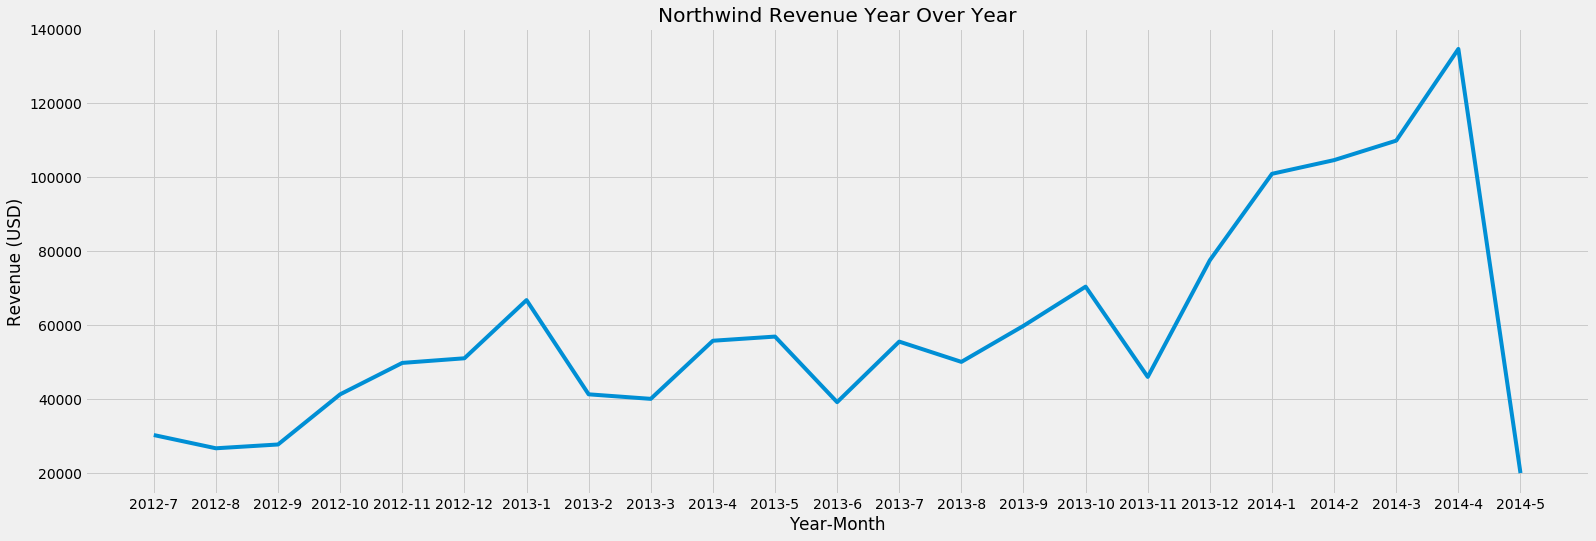

In [253]:
fig = plt.figure(figsize=(24,8))
ax = plt.axes()
ax.plot(rev_viz.Month_Year, rev_viz.Revenue);
plt.title('Northwind Revenue Year Over Year');
plt.xlabel('Year-Month');
plt.ylabel('Revenue (USD)');

#### Orders by month visualisation

In [254]:
aggregation_functions = {'Revenue': 'sum', 'Month_Year': 'first', 'CustomerId': 'first', 'OrderDate': 'first', 'OrderId': 'first'}
order_viz = revenue.groupby(revenue['OrderId']).aggregate(aggregation_functions)
order_viz.sort_values(by='OrderDate', inplace=True)
order_viz.head()

,Revenue,Month_Year,CustomerId,OrderDate,OrderId
OrderId,,,,,
10248,440.0,2012-7,VINET,2012-07-04,10248
10249,1863.4,2012-7,TOMSP,2012-07-05,10249
10250,1813.0,2012-7,HANAR,2012-07-08,10250
10251,670.8,2012-7,VICTE,2012-07-08,10251
10252,3730.0,2012-7,SUPRD,2012-07-09,10252


# Hypotehsis synthesis and testing

## Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

#### Retrieving Pertinent Data

In [256]:
display(order_detail_data.head())
display("----Discount counts----", order_detail_data['Discount'].value_counts())

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


'----Discount counts----'

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [257]:
#parsing out data by discount level
#I combined discount levels 1 to 6 due to the small sample sizes
discount_yes = order_detail_data.loc[order_detail_data['Discount'] != 0.00]
discount_no = order_detail_data.loc[order_detail_data['Discount'] == 0.00]
discount_10 = order_detail_data.loc[order_detail_data['Discount'] == 0.10]
discount_15 = order_detail_data.loc[order_detail_data['Discount'] == 0.15]
discount_20 = order_detail_data.loc[order_detail_data['Discount'] == 0.20]
discount_25 = order_detail_data.loc[order_detail_data['Discount'] == 0.25]

In [258]:
cur.execute("""SELECT * FROM OrderDetail 
            WHERE Discount > 0.00 AND Discount <= 0.06""")
discount_1_to_6 = pd.DataFrame(cur.fetchall())
discount_1_to_6.columns = [x[0] for x in cur.description]
display(len(discount_1_to_6))
discount_1_to_6.head()

193

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10251/22,10251,22,16.8,6,0.05
1,10251/57,10251,57,15.6,15,0.05
2,10252/20,10252,20,64.8,40,0.05
3,10252/33,10252,33,2.0,25,0.05
4,10266/12,10266,12,30.4,12,0.05


In [259]:
disc_libraries = {'discount_yes': discount_yes, 'discount_1_to_6': discount_1_to_6, 
                 'discount_10': discount_10, 'discount_15': discount_15, 'discount_20': discount_20, 
                 'discount_25': discount_25}

for key, value in disc_libraries.items():
    print('There are {} values in {}'.format(len(value), key))

There are 838 values in discount_yes
There are 193 values in discount_1_to_6
There are 173 values in discount_10
There are 157 values in discount_15
There are 161 values in discount_20
There are 154 values in discount_25


In [260]:
a = discount_no['Quantity'].tolist()
b = discount_yes['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b

In [261]:
diff_mu_a_b

-5.394523243866239

In [262]:
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)

(1317, 1)

(838, 1)

In [263]:
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff

-0.5930334545678626

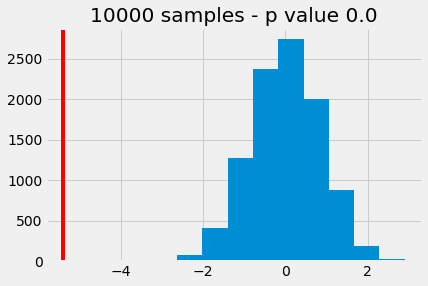

In [264]:
sample_diffs = []
counter = 0
x = 10000
for i in range(x):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f'{x} samples - p value {counter/x}');

There is a significant difference between the mean quantity of items ordered when a discount is applied vs when there is not. Further examination must happen to determine the extent of the effect. 

In [265]:
def monte(list1, list2, label):
    x=10000
    diff_mu_list1_list2 = np.mean(list1) - np.mean(list2)
    all_data =  list1 + list2
    diff_mu_list1_list2
    df = pd.DataFrame({'all_data':all_data})
    sample_a = df.sample(replace = False, n = len(list1))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_mean_diff
    sample_diffs = []
    counter = 0
    for i in range(x):
        sample_a = df.sample(replace = False, n = len(list1))
        sample_b = df.drop(sample_a.index, axis = 0)
        sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
        sample_diffs.append(sample_mean_diff)
        if sample_mean_diff < diff_mu_list1_list2:
            counter += 1
    plt.hist(sample_diffs);
    plt.axvline(diff_mu_list1_list2, color = 'red');
    plt.title(f' {label}\n {x} samples - p value {counter/x}');
    plt.show()

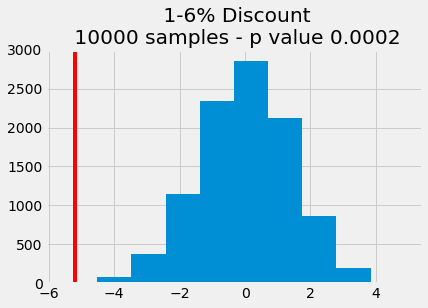

In [266]:
monte(discount_no['Quantity'].tolist(), discount_1_to_6['Quantity'].tolist(), '1-6% Discount')

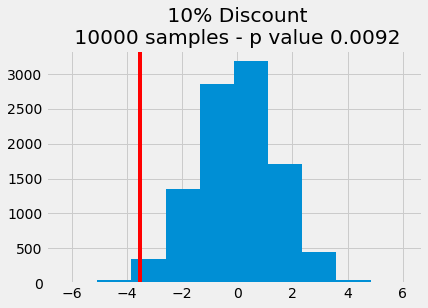

In [267]:
monte(discount_no['Quantity'].tolist(), discount_10['Quantity'].tolist(), '10% Discount')

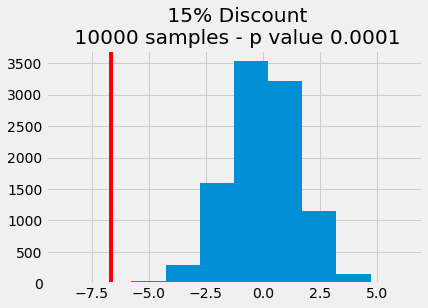

In [268]:
monte(discount_no['Quantity'].tolist(), discount_15['Quantity'].tolist(), '15% Discount')

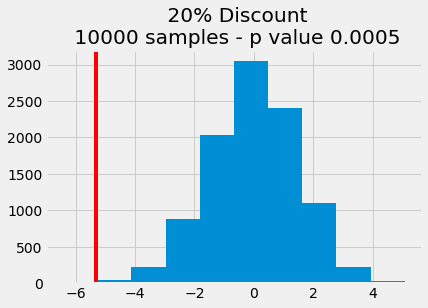

In [269]:
monte(discount_no['Quantity'].tolist(), discount_20['Quantity'].tolist(), '20% Discount')

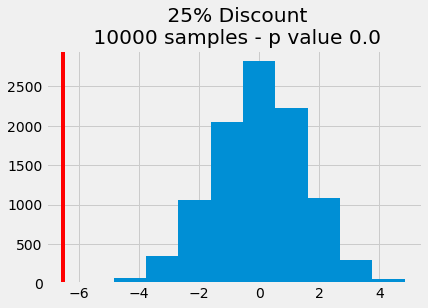

In [270]:
monte(discount_no['Quantity'].tolist(), discount_25['Quantity'].tolist(), '25% Discount')

Every level of discount has a significantly higher than average quantity of items ordered.

## Question 2 UNANSWERED

In [271]:
#Are discounted cereal/grains ordered in higher quantities than other discounted items??
cur.execute("""SELECT * FROM OrderDetail
                JOIN Product ON Product.Id = OrderDetail.ProductId
                JOIN Category ON Category.Id = Product.CategoryId""")
Q2 = pd.DataFrame(cur.fetchall())
Q2.columns = [x[0] for x in cur.description]
Q2_no_d = Q2.loc[Q2['Discount'] == 0.00]
Q2_d = Q2.loc[Q2['Discount'] != 0.00]
Q2_d_5 = Q2.loc[Q2['CategoryId'] == 5]
display(len(Q2_d), len(Q2_no_d))
display(Q2_d.head(1), Q2_no_d.head(1))

838

1317

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
6,10250/51,10250,51,42.4,35,0.15,51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.0,20,0,10,0,7,Produce,Dried fruit and bean curd


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
0,10248/11,10248,11,14.0,12,0.0,11,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0,4,Dairy Products,Cheeses


In [278]:
monte(N_America['Freight']..tolist(), W_Europe['Freight'].tolist(), '10% Discount')

SyntaxError: invalid syntax (<ipython-input-278-7015426abd4d>, line 1)

In [ ]:

x = 10000
a = Q2_d['Quantity'].tolist()
b = Q2_d_5['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b
diff_mu_a_b
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff
sample_diffs = []
counter = 0
for i in range(x):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {x} samples - p value {counter/x}');
beta = 1 - (counter/x)
print('beta value:',beta)

On average, category 5 goods are ordered less often, relative to other discounted items. Ho is not rejected.

## Question 3

In [279]:
#Do countires outside of the US have higher freight costs? 
order_data.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [280]:
order_data.Freight.describe()

count     830.000000
mean       78.244205
std       116.779294
min         0.020000
25%        13.380000
50%        41.360000
75%        91.430000
max      1007.640000
Name: Freight, dtype: float64

In [281]:
W_Europe = order_data.loc[order_data['ShipRegion'] == 'Western Europe']
E_Europe = order_data.loc[order_data['ShipRegion'] == 'Eastern Europe']
S_Europe = order_data.loc[order_data['ShipRegion'] == 'Southern Europe']
N_Europe = order_data.loc[order_data['ShipRegion'] == 'Northern Europe']
British_Isles = order_data.loc[order_data['ShipRegion'] == 'British Isles']
N_America = order_data.loc[order_data['ShipRegion'] == 'North America']
S_America = order_data.loc[order_data['ShipRegion'] == 'South America']
C_America = order_data.loc[order_data['ShipRegion'] == 'Central America']
Scandinavia = order_data.loc[order_data['ShipRegion'] == 'Scandinavia']

In [282]:
N_America_freight_mean = N_America.Freight.mean()

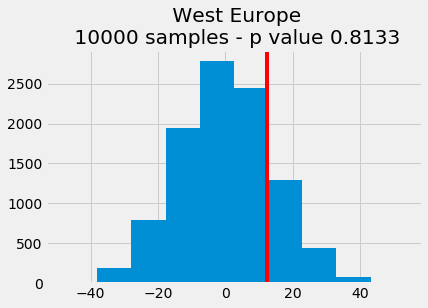

In [283]:
monte(N_America['Freight'].tolist(), W_Europe['Freight'].tolist(), 'West Europe')

West Europe freight costs are not significantlty higher than North America freight rates. Ho cannot be rejected.

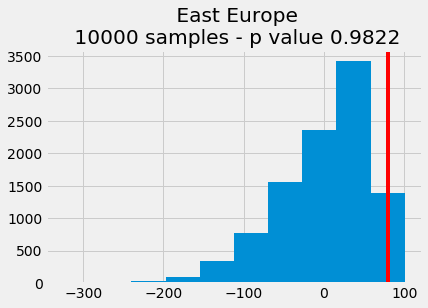

In [284]:
monte(N_America['Freight'].tolist(), E_Europe['Freight'].tolist(), 'East Europe')

East Europe sample to small for comparison

South Europe freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.
Freight costs are significantly lower than North America average freight costs.

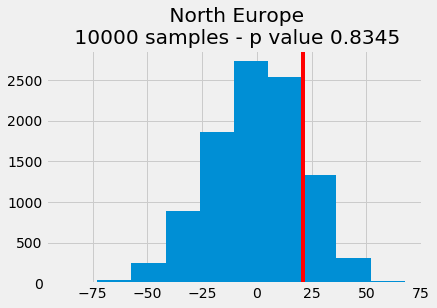

In [285]:
monte(N_America['Freight'].tolist(), N_Europe['Freight'].tolist(), 'North Europe')

N Europe freight costs are not significantly higher than North America freight rates. Ho cannot be rejected.

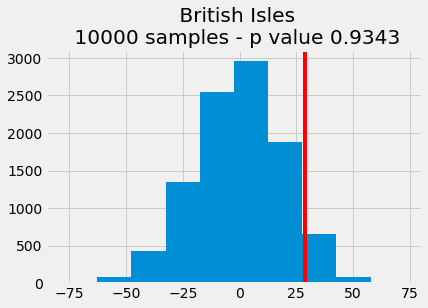

In [286]:
monte(N_America['Freight'].tolist(), British_Isles['Freight'].tolist(), 'British Isles')

British_Isles freight costs are not significantly higher than North America freight rates.  Ho cannot be rejected.

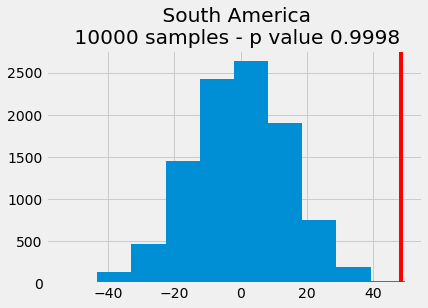

In [287]:
monte(N_America['Freight'].tolist(), S_America['Freight'].tolist(), 'South America')

South America freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.

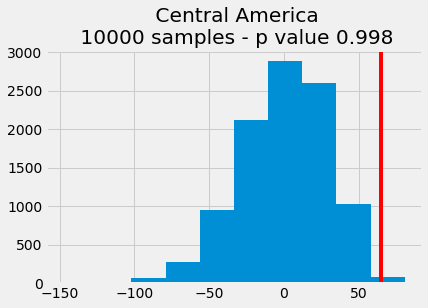

In [288]:
monte(N_America['Freight'].tolist(), C_America['Freight'].tolist(), 'Central America')

Central America freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.

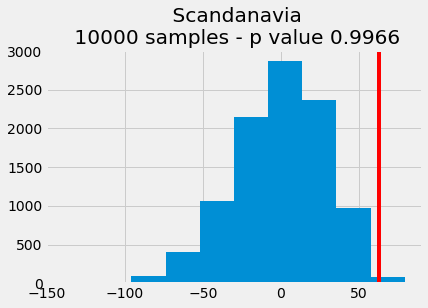

In [289]:
monte(N_America['Freight'].tolist(), Scandinavia['Freight'].tolist(), 'Scandanavia')

Scandanavia freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.

## Question 4

In [290]:
#What categories of food product have higher discontinuation rates??

In [291]:
display(category_data.head(1), product_data.head(1))

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0


In [292]:
cur.execute("""SELECT * FROM Product
                JOIN Category
                ON Product.CategoryId = Category.Id""")
product_category = pd.DataFrame(cur.fetchall())
product_category.columns = [x[0] for x in cur.description]
product_category

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0,7,Produce,Dried fruit and bean curd
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1,6,Meat/Poultry,Prepared meats
9,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0,8,Seafood,Seaweed and fish


In [293]:
product_category.CategoryName.unique()

array(['Beverages', 'Condiments', 'Produce', 'Meat/Poultry', 'Seafood',
       'Dairy Products', 'Confections', 'Grains/Cereals'], dtype=object)

In [294]:
product_category_dcd = product_category.loc[product_category['Discontinued'] == 1]
product_category_cont = product_category.loc[product_category['Discontinued'] == 0]

In [296]:
product_category1 = product_category.loc[product_category['CategoryId'] == 1]
product_category1.Discontinued.value_counts()

0    11
1     1
Name: Discontinued, dtype: int64

In [297]:
product_category.Discontinued.value_counts()

0    69
1     8
Name: Discontinued, dtype: int64

In [298]:
from scipy.stats import chi2_contingency

In [305]:
chi2_contingency([58, 7], [11, 1])

(0.0, 1.0, 0, array([58.,  7.]))

No category of food product is discontinued at a rate significatly greater than another. 